#Project 1

##1. Part 1
### Importing Libraries and Setting Data Location

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
filename = '/content/drive/MyDrive/Colab Notebooks/Coding Dojo - Data Science Bootcamp/Project 1/Part 1/sales_predictions.csv'

Mounted at /content/drive


###Reading Data into DataFrame & Displaying head

In [2]:
df = pd.read_csv(filename)

#Copying df to run SimpleImputer method and compare fill outcome
df_base = pd.read_csv(filename)

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


###<p>Here is the Data Dictionary for this dataset:</p>

<table><tbody><tr><td><strong>Variable&nbsp;Name</strong></td><td><strong>Description</strong></td></tr><tr><td>Item_Identifier</td><td>Unique product ID</td></tr><tr><td>Item_Weight</td><td>Weight of product</td></tr><tr><td>Item_Fat_Content</td><td>Whether the product is low fat or regular</td></tr><tr><td>Item_Visibility</td><td>The percentage of total display area of all products in a store allocated to the particular product</td></tr><tr><td>Item_Type</td><td>The category to which the product belongs</td></tr><tr><td>Item_MRP</td><td>Maximum Retail Price (list price) of the product</td></tr><tr><td>Outlet_Identifier</td><td>Unique store ID</td></tr><tr><td>Outlet_Establishment_Year</td><td>The year in which store was established</td></tr><tr><td>Outlet_Size</td><td>The size of the store in terms of ground area covered</td></tr><tr><td>Outlet_Location_Type</td><td>The type of area in which the store is located</td></tr><tr><td>Outlet_Type</td><td>Whether the outlet is a grocery store or some sort of supermarket</td></tr><tr><td>Item_Outlet_Sales</td><td>Sales of the product in the particular store. This is the target variable to be predicted.
<a href="https://github.com/ShauryaBhandari/Bigmart-Sales-Prediction#why-does-the-the-problem-need-to-be-solved" id="user-content-why-does-the-the-problem-need-to-be-solved" class="anchor" aria-hidden="true" target="_blank"></a></td></tr></tbody></table>

##Part 2

###1. How many rows and columns?

In [3]:
print(df.shape)
print(f"Number of Rows is: {len(df)}")
print(f"Number of Columns is: {len(df.columns)}")

(8523, 12)
Number of Rows is: 8523
Number of Columns is: 12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


###2. What are the datatypes of each variable?

In [5]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

###3. Are there duplicates? If so, drop any duplicates

In [6]:
df.duplicated().any()

False

###4. Identify missing values

####Which Columns ?

In [7]:
df.isna().any()

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

####How many records ?

In [8]:
print(df.isna().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


####Show Records with Null Values

In [9]:
missingItemWeight = df[df['Item_Weight'].isna()]
missingOutletSize = df[df['Outlet_Size'].isna()]
print(f'Number of records missing Outlet_Size is: {len(missingOutletSize)}')
print(f'Number of records missing Item_Weight is: {len(missingItemWeight)}')

Number of records missing Outlet_Size is: 2410
Number of records missing Item_Weight is: 1463


In [10]:
missingOutletSize

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [11]:
missingItemWeight

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


###5. Decide on how to address the missing values and do it! (explain your choice)

####a. Outlet_Size Analysis & Correction

#####Checking if missing value can be inferred from other records

In [12]:
df.groupby(['Outlet_Location_Type','Outlet_Type','Outlet_Size','Outlet_Identifier'])['Item_Outlet_Sales'].sum()

Outlet_Location_Type  Outlet_Type        Outlet_Size  Outlet_Identifier
Tier 1                Grocery Store      Small        OUT019               1.796941e+05
                      Supermarket Type1  Medium       OUT049               2.183970e+06
                                         Small        OUT046               2.118395e+06
Tier 2                Supermarket Type1  Small        OUT035               2.268123e+06
Tier 3                Supermarket Type1  High         OUT013               2.142664e+06
                      Supermarket Type2  Medium       OUT018               1.851823e+06
                      Supermarket Type3  Medium       OUT027               3.453926e+06
Name: Item_Outlet_Sales, dtype: float64

In [13]:
df[df['Outlet_Size'].isna()].groupby(['Outlet_Location_Type','Outlet_Type','Outlet_Identifier'])['Item_Outlet_Sales'].sum()

Outlet_Location_Type  Outlet_Type        Outlet_Identifier
Tier 2                Supermarket Type1  OUT017               2.167465e+06
                                         OUT045               2.036725e+06
Tier 3                Grocery Store      OUT010               1.883402e+05
Name: Item_Outlet_Sales, dtype: float64

######Filling values for Outlet_Size

In [14]:
#Since all Outlets of Tier 2 & Outlet_Type Supermarket Type1 have an Outlet_Size of Small,
#Filling Outlet_Size values for OUT045 & OUT017 with inferred size Small
#Total Item_Outlet_Sales does not seem to be correlated to Outlet_Size alone for Tier 1
#For Tier 3 it seems related to Size and thus OUT010 could consequently be of size Medium


outletIDFilter1 = df['Outlet_Identifier'] == 'OUT045'
outletIDFilter2 = df['Outlet_Identifier'] == 'OUT017'
outletIDFilter3 = df['Outlet_Identifier'] == 'OUT010'
df.loc[outletIDFilter1 | outletIDFilter2, 'Outlet_Size'] = 'Small'
df.loc[outletIDFilter3,'Outlet_Size'] = 'Medium'

######Verifying Outlet_Size for OUT017 & OUT045 are filled

In [15]:
df['Outlet_Size'].isna().sum()
#Remaining Null Values in Outlet_Size is 0, no more Null values

0

In [16]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#####Testing Simple Imputer


In [17]:
import sys
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(df_base)

filled_df = imputer.transform(df_base)
filled_df = pd.DataFrame(filled_df)
filled_df.columns = (['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'])
filled_df.head(10)
df_base['Outlet_Size'] = filled_df['Outlet_Size']
filled_df.groupby(['Outlet_Size','Outlet_Identifier'])['Outlet_Identifier'].count()

#Result of SimpleImputer using most_frequent strategy is different than inferred result
#SimpleImputer filled Size for all Outlet_Identifiers with Medium

#Will stick with Inferred values for Outlet_Size since SimpleImputer documentation
#mentions that the method does not take into consideration cross categorical corelations

Outlet_Size  Outlet_Identifier
High         OUT013               932
Medium       OUT010               555
             OUT017               926
             OUT018               928
             OUT027               935
             OUT045               929
             OUT049               930
Small        OUT019               528
             OUT035               930
             OUT046               930
Name: Outlet_Identifier, dtype: int64

In [18]:
df_base.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

####b. Item_Weight Analysis & Correction

#####Calculating mean weight per item type

In [19]:
meanWeightPerType = df.groupby('Item_Type')['Item_Weight'].median()
meanWeightPerType = pd.DataFrame(meanWeightPerType.rename_axis('Item_Type').reset_index())
meanWeightPerType.columns=['Item_Type','Mean_Weight']

In [20]:
#Validating the results match the count returned by .info() 
print(f"\n Number of records with Null Item_Weight: {len(missingItemWeight)}")


 Number of records with Null Item_Weight: 1463


#####Calculating total & null counts per item type and percentage missing

In [21]:
countByType = pd.DataFrame(df[['Item_Type']].value_counts().rename_axis('Item_Type').reset_index(name='Count'))

naFilter = df['Item_Weight'].isna()

onlyNa = df[naFilter]
onlyNaCount = pd.DataFrame(onlyNa[['Item_Type']].value_counts().rename_axis('Item_Type').reset_index(name='Count'))
onlyNaCount

itemTypeData = pd.concat([countByType, onlyNaCount['Count'], meanWeightPerType['Mean_Weight']],axis=1)
itemTypeData.columns=['Item_Type','Total_Count','Count_Missing','Mean_Weight']

itemTypeData['Percent_Missing'] = itemTypeData['Count_Missing']/itemTypeData['Total_Count'] * 100
itemTypeData

,Item_Type,Total_Count,Count_Missing,Mean_Weight,Percent_Missing
0,Fruits and Vegetables,1232,213,11.650,17.288961
1,Snack Foods,1200,212,10.600,17.666667
2,Household,910,151,10.695,16.593407
3,Frozen Foods,856,138,12.150,16.121495
4,Dairy,682,116,13.350,17.008798
5,Canned,649,112,12.850,17.257319
6,Baking Goods,648,110,13.100,16.975309
7,Health and Hygiene,520,90,10.100,17.307692
8,Soft Drinks,445,88,12.150,19.775281
9,Meat,425,71,13.150,16.705882


#####Summary Data for Item_Type Snack Foods

In [22]:
oneTypeSummary = df[df['Item_Type']=='Household']
oneTypeSummary.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,759.000000,910.000000,910.000000,910.000000,910.000000
mean,13.384736,0.061322,149.424753,1997.784615,2258.784300
std,4.998845,0.052092,62.394009,8.297533,1692.245757
min,5.030000,0.000000,32.455800,1985.000000,33.290000
25%,8.695000,0.024718,107.762200,1987.000000,853.389150
50%,13.150000,0.044997,153.318200,1999.000000,1981.420800
75%,18.350000,0.090561,191.599750,2004.000000,3236.786700
max,21.250000,0.325781,264.791000,2009.000000,13086.964800


#####Using SimpleImputer to fill Item_Weight Null values using most_frequent strategy

In [23]:
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(df_base)

filled_df = imputer.transform(df_base)
filled_df = pd.DataFrame(filled_df)
filled_df.columns = (['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'])

df_base['Item_Weight'] = filled_df['Item_Weight']
df_base['Item_Weight'].isna().sum()

0

In [24]:
#Copying Item_Weight to main DataFrame (df) from Testing DataFrame (df_base)
#Since data observation and analysis did not yield any better results
df['Item_Weight'] = df_base['Item_Weight']

###6. Confirm that there are no missing values after addressing them

In [25]:
df.isna().any()

Item_Identifier              False
Item_Weight                  False
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                  False
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

###7. Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 

####Check and Fix Item_Fat_Conetnets field

In [26]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [27]:
df['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'},inplace=True)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

####Checking Outlet_Location_Type, Outlet_Type, Outlet_Establishment_Year

In [28]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [29]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [30]:
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

###8. For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [31]:
df.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


##3. Part 3

In [32]:
#Imports

import seaborn as sns
import matplotlib.pyplot as plt

###Correlation Heatmap

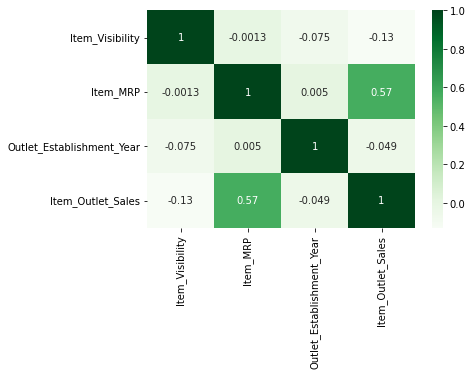

In [33]:
corr = df.corr()
sns.heatmap(corr, cmap='Greens', annot=True)

###Histograms

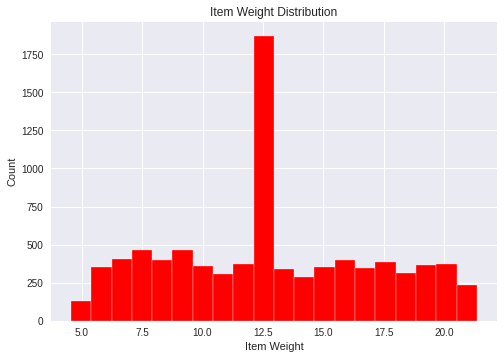

In [69]:
plt.style.use('seaborn')
plt.title("Item Weight Distribution")
plt.ylabel('Count')
plt.xlabel('Item Weight')
df['Item_Weight'].hist(bins=20,color='r', edgecolor='white');

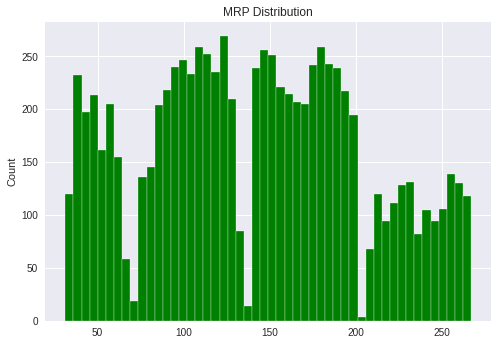

In [70]:
plt.style.use('seaborn')
plt.title("MRP Distribution")
plt.ylabel('Count')
df['Item_MRP'].hist(bins=50,color='g',edgecolor='white');

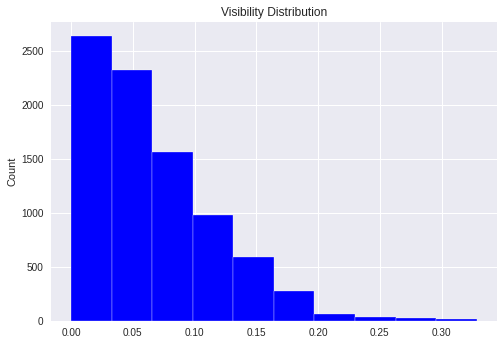

In [71]:
plt.style.use('seaborn')
plt.title("Visibility Distribution")
plt.ylabel('Count')
df['Item_Visibility'].hist(bins=10,color='b',edgecolor='white');

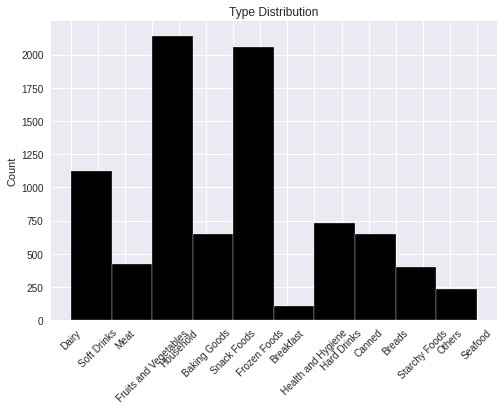

In [72]:
plt.style.use('seaborn')
plt.title("Type Distribution")
plt.ylabel('Count')
plt.xticks(rotation=45)
df['Item_Type'].hist(color='k',edgecolor='white');

###Boxplots

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


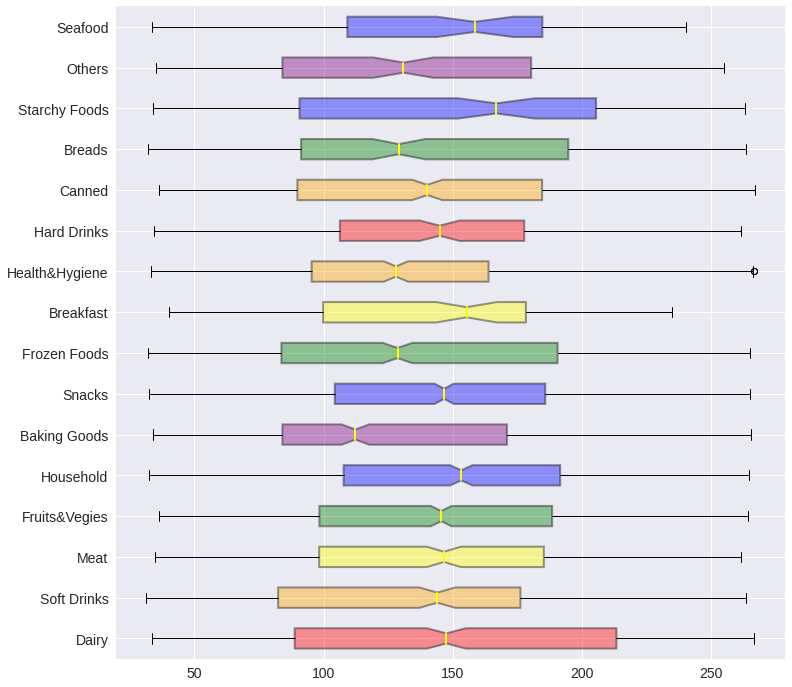

In [68]:
#Item MRP by Types Summaries
dairyMRP = df.loc[df['Item_Type'] == 'Dairy','Item_MRP']
softDrinksMRP = df.loc[df['Item_Type'] == 'Soft Drinks','Item_MRP']
meatMRP = df.loc[df['Item_Type'] == 'Meat','Item_MRP']
fruitsVegMRP = df.loc[df['Item_Type'] == 'Fruits and Vegetables','Item_MRP']
householdMRP = df.loc[df['Item_Type'] == 'Household','Item_MRP']
bakingGoodsMRP = df.loc[df['Item_Type'] == 'Baking Goods','Item_MRP']
snackMRP = df.loc[df['Item_Type'] == 'Snack Foods','Item_MRP']
frozenMRP = df.loc[df['Item_Type'] == 'Frozen Foods','Item_MRP']
breakfastMRP = df.loc[df['Item_Type'] == 'Breakfast','Item_MRP']
HnHMRP = df.loc[df['Item_Type'] == 'Health and Hygiene','Item_MRP']
hardDrinksMRP = df.loc[df['Item_Type'] == 'Hard Drinks','Item_MRP']
cannedMRP = df.loc[df['Item_Type'] == 'Canned','Item_MRP']
breadsMRP = df.loc[df['Item_Type'] == 'Breads','Item_MRP']
starchyMRP = df.loc[df['Item_Type'] == 'Starchy Foods','Item_MRP']
othersMRP = df.loc[df['Item_Type'] == 'Others','Item_MRP']
seafoodMRP = df.loc[df['Item_Type'] == 'Seafood','Item_MRP']

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (12,12));
boxplots = axes.boxplot([dairyMRP,softDrinksMRP,meatMRP,fruitsVegMRP,
              householdMRP,bakingGoodsMRP,snackMRP,frozenMRP,
              breakfastMRP,HnHMRP,hardDrinksMRP,cannedMRP,breadsMRP,
              starchyMRP,othersMRP,seafoodMRP], 
              notch = True, labels = ['Dairy','Soft Drinks','Meat',
              'Fruits&Vegies','Household','Baking Goods','Snacks','Frozen Foods',
              'Breakfast','Health&Hygiene','Hard Drinks','Canned','Breads',
              'Starchy Foods','Others','Seafood'], patch_artist=True,
              medianprops = dict(linestyle ='-', linewidth=2,color='Yellow'),
              boxprops=dict(linestyle='--',linewidth=2,color='Black',facecolor='blue',alpha=.4), vert=False);
#plt.xticks(rotation=45);
dairyplot = boxplots['boxes'][0];
dairyplot.set_facecolor('red');
softDrinksPlot = boxplots['boxes'][1];
softDrinksPlot.set_facecolor('orange');
meatPlot = boxplots['boxes'][2];
meatPlot.set_facecolor('Yellow');
fruitsVegPlot = boxplots['boxes'][3];
fruitsVegPlot.set_facecolor('green');
bakingGoodsPlot = boxplots['boxes'][4];
bakingGoodsPlot.set_facecolor('blue');
snacksPlot = boxplots['boxes'][5];
snacksPlot.set_facecolor('purple');
frozenPlot = boxplots['boxes'][6];
frozenPlot.set_facecolor('blue');
breakfastPlot = boxplots['boxes'][7];
breakfastPlot.set_facecolor('green');
HnHPlot = boxplots['boxes'][8];
HnHPlot.set_facecolor('Yellow');
hardDrinksPlot = boxplots['boxes'][9];
hardDrinksPlot.set_facecolor('orange');
cannedPlot = boxplots['boxes'][10];
cannedPlot.set_facecolor('red');
breadsPlot = boxplots['boxes'][11];
breadsPlot.set_facecolor('orange');
starchyPlot = boxplots['boxes'][12];
starchyPlot.set_facecolor('green');
otherPlot = boxplots['boxes'][13];
otherPlot.set_facecolor('blue');
seafoodPlot = boxplots['boxes'][14];
seafoodPlot.set_facecolor('purple');
plt.style.use('seaborn');
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


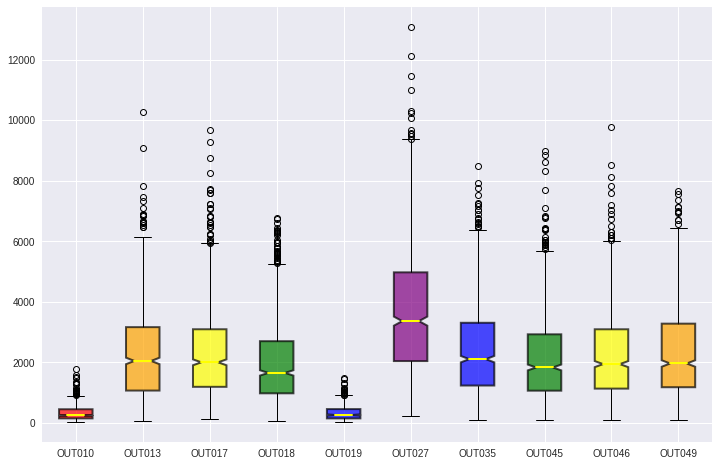

In [53]:
#Total Sales by Outlet Summaries
out010 = df.loc[df['Outlet_Identifier']=='OUT010','Item_Outlet_Sales']
out013 = df.loc[df['Outlet_Identifier']=='OUT013','Item_Outlet_Sales']
out017 = df.loc[df['Outlet_Identifier']=='OUT017','Item_Outlet_Sales']
out018 = df.loc[df['Outlet_Identifier']=='OUT018','Item_Outlet_Sales']
out019 = df.loc[df['Outlet_Identifier']=='OUT019','Item_Outlet_Sales']
out027 = df.loc[df['Outlet_Identifier']=='OUT027','Item_Outlet_Sales']
out035 = df.loc[df['Outlet_Identifier']=='OUT035','Item_Outlet_Sales']
out045 = df.loc[df['Outlet_Identifier']=='OUT045','Item_Outlet_Sales']
out046 = df.loc[df['Outlet_Identifier']=='OUT046','Item_Outlet_Sales']
out049 = df.loc[df['Outlet_Identifier']=='OUT049','Item_Outlet_Sales']

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (12,8))
boxplots = axes.boxplot([out010,out013,out017,out018,out019,out027,out035,out045,out046,out049], 
              notch = True, labels = ['OUT010','OUT013','OUT017','OUT018','OUT019','OUT027','OUT035','OUT045','OUT046','OUT049'], patch_artist=True,
              medianprops = dict(linestyle ='-', linewidth=2,color='Yellow'),
              boxprops=dict(linestyle='--',linewidth=2,color='Black',facecolor='blue',alpha=.7));
#plt.xticks(rotation=45);
dairyplot = boxplots['boxes'][0]
dairyplot.set_facecolor('red')
softDrinksPlot = boxplots['boxes'][1]
softDrinksPlot.set_facecolor('orange')
meatPlot = boxplots['boxes'][2]
meatPlot.set_facecolor('Yellow')
fruitsVegPlot = boxplots['boxes'][3]
fruitsVegPlot.set_facecolor('green')
bakingGoodsPlot = boxplots['boxes'][4]
bakingGoodsPlot.set_facecolor('blue')
snacksPlot = boxplots['boxes'][5]
snacksPlot.set_facecolor('purple')
frozenPlot = boxplots['boxes'][6]
frozenPlot.set_facecolor('blue')
breakfastPlot = boxplots['boxes'][7]
breakfastPlot.set_facecolor('green')
HnHPlot = boxplots['boxes'][8]
HnHPlot.set_facecolor('Yellow')
hardDrinksPlot = boxplots['boxes'][9]
hardDrinksPlot.set_facecolor('orange');


##ScratchPad

In [42]:
typeTotalItemSales = df['Item_Outlet_Sales'].groupby([df['Item_Type']]).sum().reset_index(name='Type_Total_Sales')
typeTotalItemSales
outletTotalSales = df['Item_Outlet_Sales'].groupby(df['Outlet_Identifier']).sum().reset_index(name='Outlet_Total_Sales')
outletTotalSales

,Outlet_Identifier,Outlet_Total_Sales
0,OUT010,1.883402e+05
1,OUT013,2.142664e+06
2,OUT017,2.167465e+06
3,OUT018,1.851823e+06
4,OUT019,1.796941e+05
5,OUT027,3.453926e+06
6,OUT035,2.268123e+06
7,OUT045,2.036725e+06
8,OUT046,2.118395e+06
9,OUT049,2.183970e+06
